# Final Project Data Science

Names: Christian Saenz, Valentina Benavides

This notebook will answer the following question:
### <font color='brown'>How good is the economy of a country based on the quality of its exported product (bananas)?</font>

<img src = "https://i.pinimg.com/originals/26/32/94/26329431dafa958ae22206d26e970a4e.jpg" style="width: 500px;"/>

# <font color='yellow'>Bananas Analysis Database</font>

<img src = "https://th.bing.com/th/id/R.0f3cc1b69f7046e6355687263aead9ee?rik=e%2fzLRdxmCMtNRA&riu=http%3a%2f%2fupload.wikimedia.org%2fwikipedia%2fcommons%2f6%2f69%2fBanana.png&ehk=0MA9r3huU44GTjIIWGK6A1R0At%2bSPNmztxBBWKsquWw%3d&risl=1&pid=ImgRaw&r=0" style="width: 90px;"/>

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("banana_quality_dataset.csv")

In [2]:
df.head(3)

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,1,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6
1,2,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8
2,3,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7


In [3]:
#Identify the type of variables that we have
df.dtypes

sample_id               int64
variety                object
region                 object
quality_score         float64
quality_category       object
ripeness_index        float64
ripeness_category      object
sugar_content_brix    float64
firmness_kgf          float64
length_cm             float64
weight_g              float64
harvest_date           object
tree_age_years        float64
altitude_m            float64
rainfall_mm           float64
soil_nitrogen_ppm     float64
dtype: object

# Part 1: Statistical Analysis

## 1.1 Statistical Summary and Distribution

We want to start doing statistics with the Quantitative variables

In [4]:
quantitative_vars = ['quality_score', 'ripeness_index', 'sugar_content_brix', 'firmness_kgf', 'length_cm', 'weight_g','tree_age_years','altitude_m','rainfall_mm','soil_nitrogen_ppm']


In [5]:
# Basic statistics to start understanding the data
basic_stats = df[quantitative_vars].describe().transpose().round(2)
# Median also is important
medians = df[quantitative_vars].median()

In [6]:
basic_stats['median'] = medians
# Show Basic Statistics
print("Basic Statistics:")
print(basic_stats)

Basic Statistics:
                     count     mean     std      min      25%      50%  \
quality_score       1000.0     2.47    0.54     0.92     2.09     2.44   
ripeness_index      1000.0     4.04    1.75     1.02     2.45     4.11   
sugar_content_brix  1000.0    18.52    2.03    15.00    16.83    18.50   
firmness_kgf        1000.0     2.71    1.29     0.50     1.59     2.68   
length_cm           1000.0    19.88    5.74    10.00    14.90    19.89   
weight_g            1000.0   164.74   49.16    81.05   122.40   163.36   
tree_age_years      1000.0    10.88    5.22     2.00     6.30    10.70   
altitude_m          1000.0   723.56  427.37     0.40   353.95   726.00   
rainfall_mm         1000.0  1972.99  564.47  1000.50  1498.75  1957.40   
soil_nitrogen_ppm   1000.0   104.39   53.61    10.00    60.15   104.10   

                        75%      max    median  
quality_score          2.85     3.89     2.440  
ripeness_index         5.56     7.00     4.110  
sugar_content_brix  

In [7]:
# Check if there are any Nan values
df.isnull().sum()

sample_id             0
variety               0
region                0
quality_score         0
quality_category      0
ripeness_index        0
ripeness_category     0
sugar_content_brix    0
firmness_kgf          0
length_cm             0
weight_g              0
harvest_date          0
tree_age_years        0
altitude_m            0
rainfall_mm           0
soil_nitrogen_ppm     0
dtype: int64

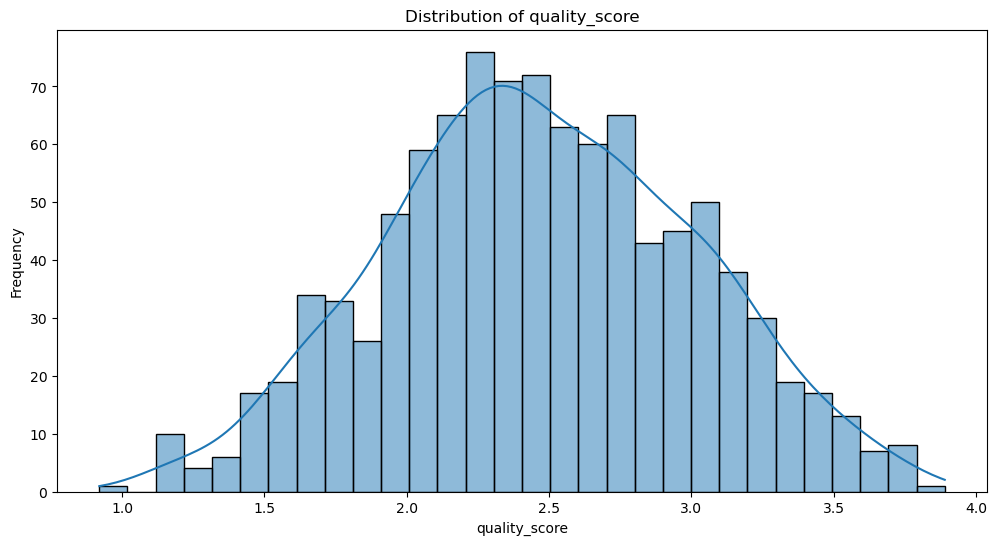

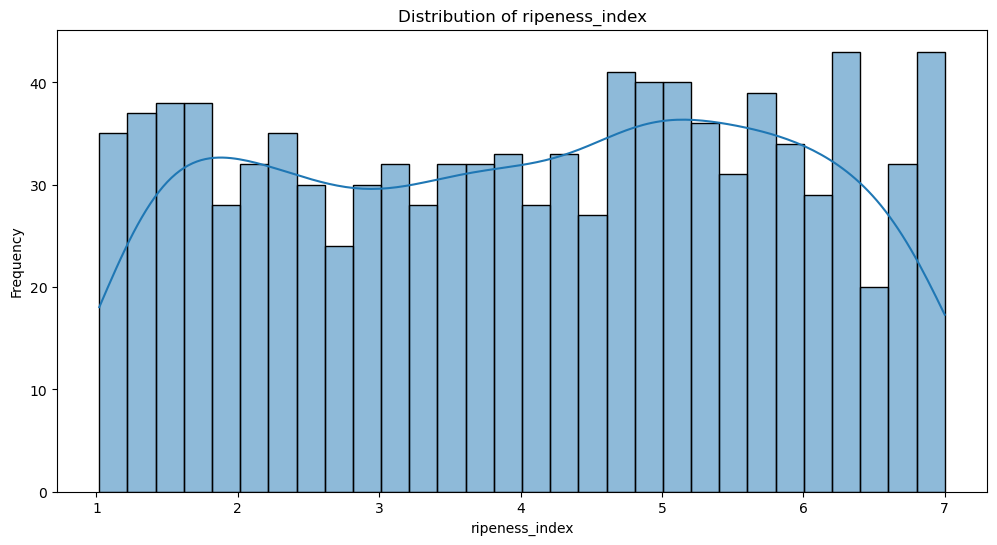

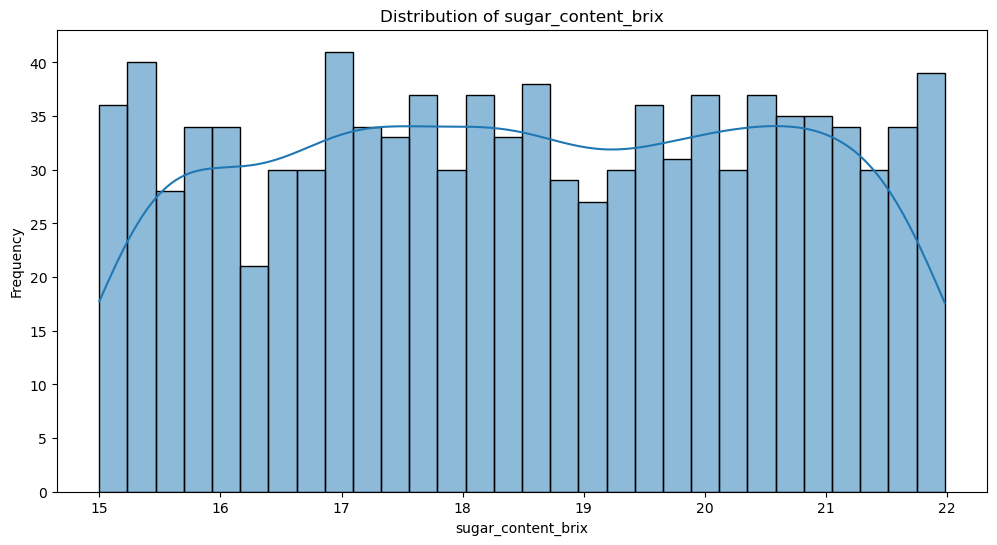

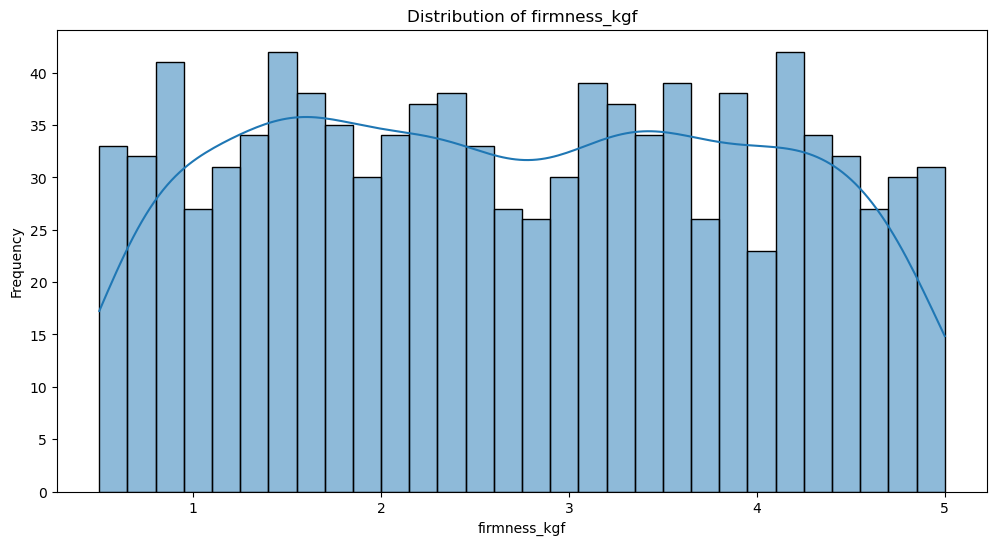

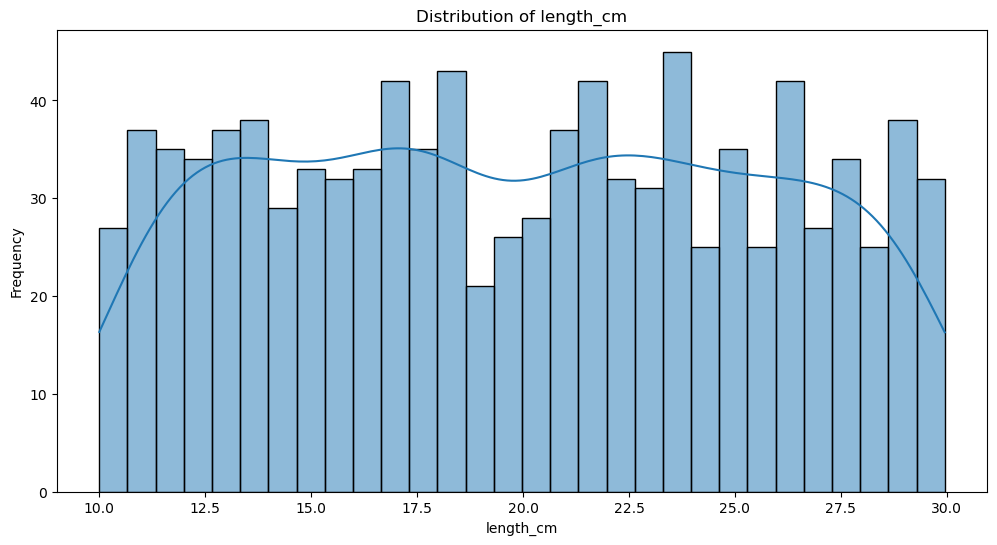

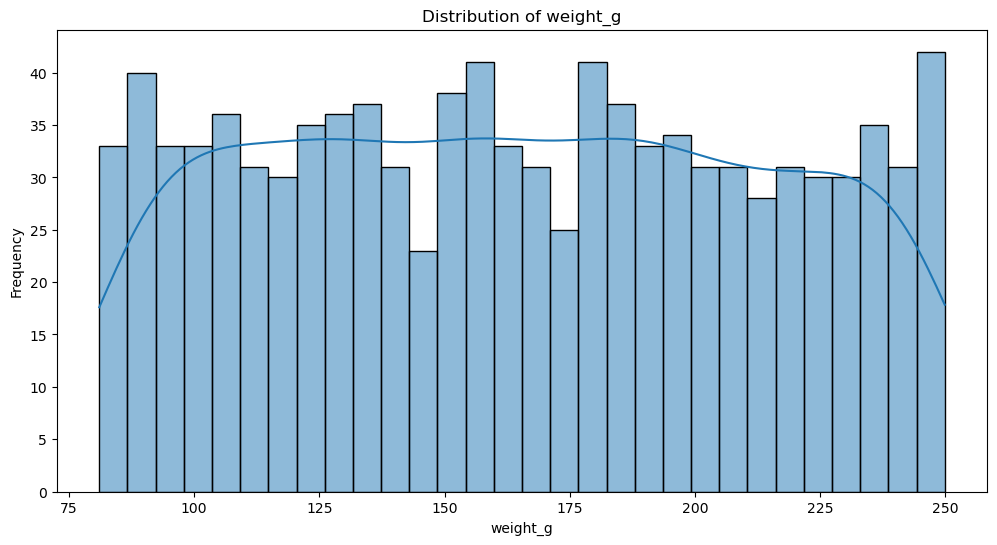

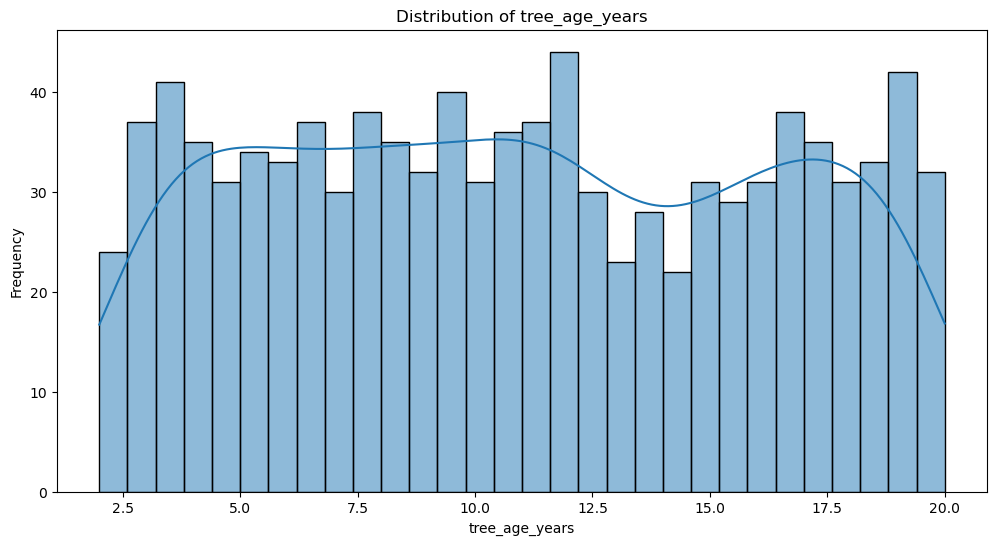

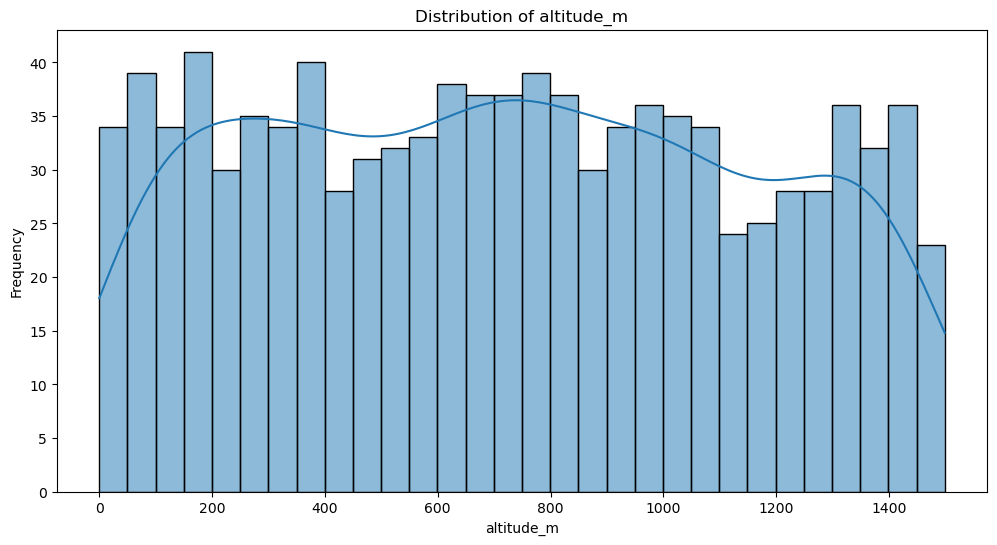

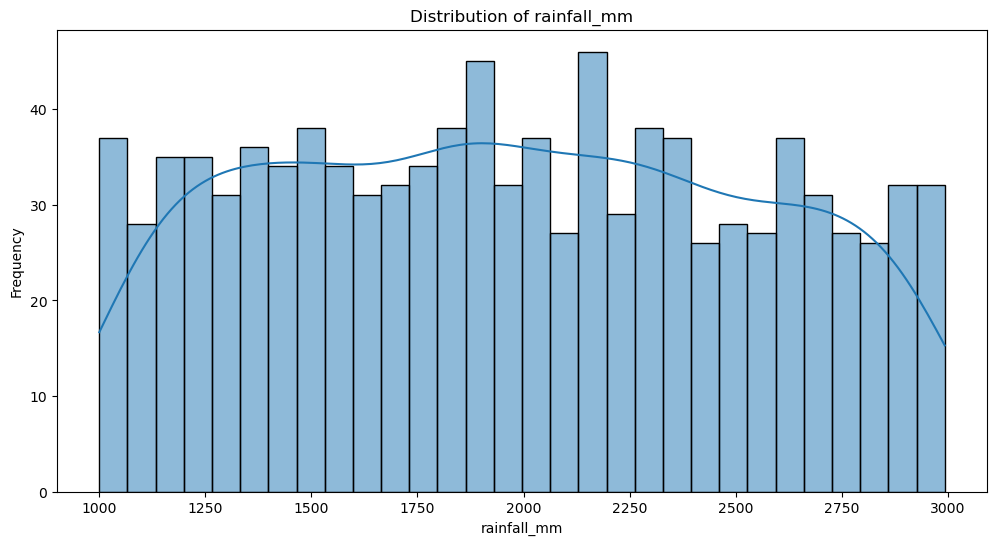

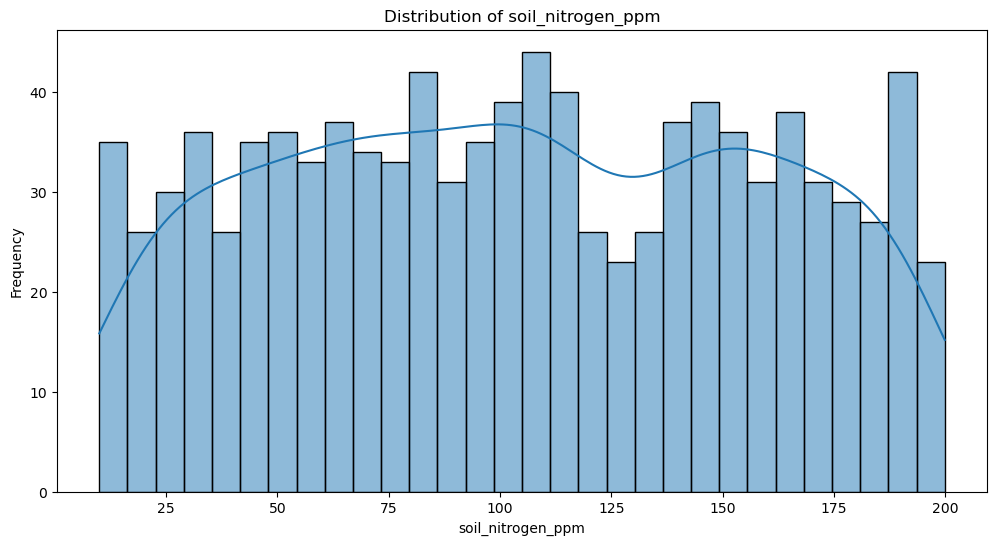

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
for var in quantitative_vars:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

## 1.2 Modification of data per each variable

Each variable is analyzed to see if it is necesary to change or not.

- **Variable: Ripeness Index**  
  - **Stats Analysis:** The range is from 1.02 to 10.0. Given the high standard deviation (1.75), there might be some unusual values close to the upper limit (e.g., 10.0).  
  - **Fact:** Typical Range: 1 (unripe) to 7-8 (fully ripe, depending on the ripeness scale used).  
  - **Modification:** YES, changing values below 3 to the median.

- **Variable: Sugar Content (Brix)**  
  - **Stats Analysis:** The maximum is 21.98, while the mean is 18.51 with a relatively small standard deviation (2.03). Values close to 21.98 might be outliers.  
  - **Fact:** Typical Range: 14–22 °Brix.  
  - **Modification:** NO, values fall within the expected range.

- **Variable: Firmness (kgf)**  
  - **Stats Analysis:** The maximum is 5.0, with a mean of 2.70 and a standard deviation of 1.28. Any value close to 5.0 could be an outlier, as it is significantly higher than the 75th percentile (3.82).  
  - **Fact:**  
    - Unripe bananas: 3.0–5.5 kgf.  
    - Ripe bananas: 1.0–3.0 kgf.  
  - **Modification:** NO, all values are plausible based on ripeness stages.

- **Variable: Length (cm)**  
  - **Stats Analysis:** The range (from 14.99 to 35.08) seems normal given the mean (19.88). No obvious outliers here.  
  - **Fact:**  
    - Small varieties: 10–15 cm.  
    - Larger varieties: 18–30 cm.  
  - **Modification:** NO, all values are realistic for banana varieties.

- **Variable: Weight (g)**  
  - **Stats Analysis:** There is a wide range from 81.05 to 316.65, but considering the mean (164.73) and standard deviation (49.16), values near the maximum might need verification.  
  - **Fact:**  
    - Small: 80–120 g.  
    - Standard: 120–200 g.  
    - Large: Up to 300 g.  
  - **Modification:** NO, all values are realistic for banana varieties.

- **Variable: Tree Age (years)**  
  - **Stats Analysis:** The range spans from 2.0 to 20.0, with a mean of 10.88. Both ends of the range (e.g., 2.0 and 20.0) could be verified for context or outliers.  
  - **Fact:**  
    - Banana trees bear fruit after 9–12 months of growth.  
    - Trees are typically replaced after 5–15 years due to declining productivity.  
  - **Modification:** YES, delete records for trees over 15 years; this is unusual and they are typically replaced.

- **Variable: Altitude (m)**  
  - **Stats Analysis:** Altitude ranges from 353.95 to 1999.90, with a mean of 1233.55. Extreme values, especially near the minimum and maximum, could be reviewed.  
  - **Fact:**  
    - Grows well at 0–2000 m but thrives best at 500–1500 m.  
  - **Modification:** NO, values are within the typical range for banana cultivation.

- **Variable: Rainfall (mm)**  
  - **Stats Analysis:** The wide range from 1000.5 to 2992.0 seems normal for a variety of regions, given the high mean (1972.99) and standard deviation (564.47). No obvious concerns here.  
  - **Fact:**  
    - Ideal: 1200–2500 mm/year.  
    - Growth possible: 1000–3000 mm/year.  
  - **Modification:** NO, values align with the expected rainfall range.

- **Variable: Soil Nitrogen (ppm)**  
  - **Stats Analysis:** There is a wide range from 10.0 to 199.90, with a mean of 104.39 and a standard deviation of 53.60. The minimum (10.0) and maximum (199.90) could indicate edge cases or outliers.  
  - **Fact:**  
    - Nitrogen levels vary based on soil type, but 100–150 ppm is typical for fertile soils.  
    - Levels below 50 ppm may indicate nutrient deficiency.  
  - **Modification:** YES, replace values <50 ppm with the 25th percentile (60.15 ppm) for a reasonable estimate.

### Ripeness Index
Changing values below 3 to the median 

In [9]:
# Calculate the median of ripeness_index
median_ripeness = df['ripeness_index'].median()

# Replace values below 3 with the median
df['ripeness_index'] = df['ripeness_index'].apply(lambda x: median_ripeness if x < 3 else x)

### Tree Age (years)
We will justs focus and work with records for trees over 15 years, this is unusual and are typically replaced

In [10]:
# Filter the DataFrame to exclude rows where tree_age_years is greater than 15
df = df[df['tree_age_years'] <= 15]

### Soil Nitrogen (ppm)
Replace values <50 ppm with the 25th percentile (60.15 ppm) for a reasonable estimate. 

In [11]:
# Define the 25th percentile value for soil_nitrogen_ppm
percentile_25 = 60.15

# Replace values <50 with the 25th percentile
df['soil_nitrogen_ppm'] = df['soil_nitrogen_ppm'].apply(lambda x: percentile_25 if x < 50 else x)

# Part 2: Correlation Analysis

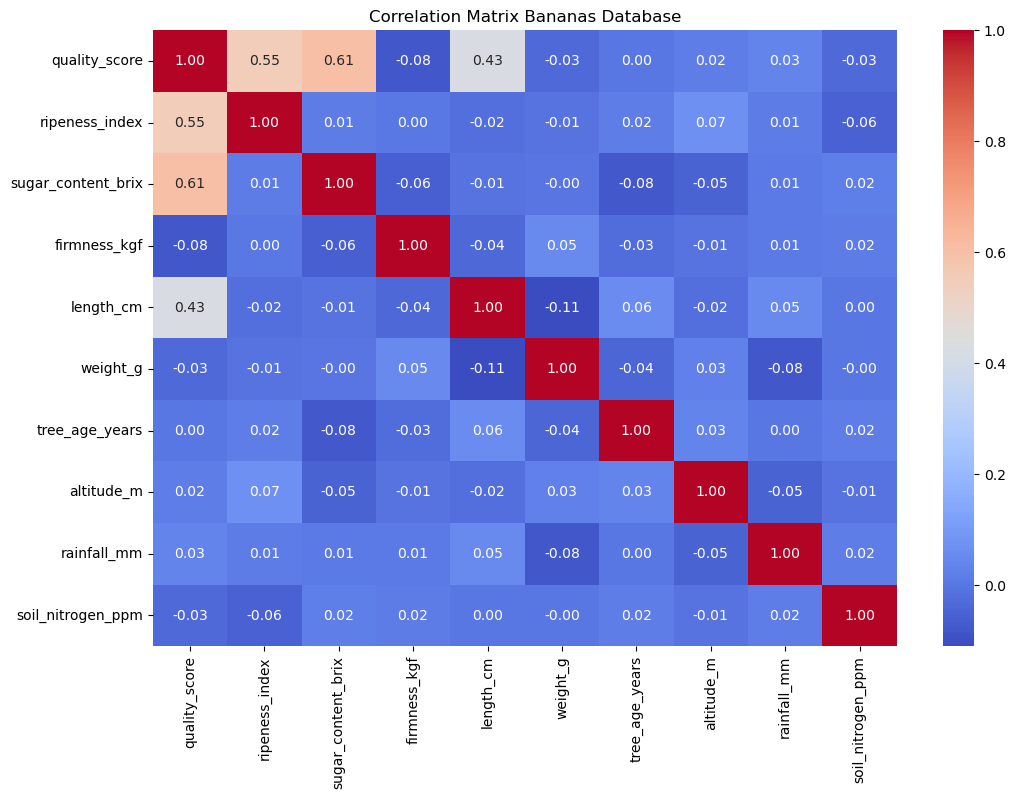

In [12]:
# Correlation Matrix with the quantitative variables
correlation_matrix = df[quantitative_vars].corr()

# Heat Map to show the correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Bananas Database')
plt.show()

Comment: It seems that the Quality Score of bananas is based on the ripeness index and the sugar contained in bananas, and that makes sense, because who likes a banana that doesn't taste sweet? So this rating is directly related to that data.

# Part 3: Analysis per Region

In [13]:
region_stats = df.groupby('region')['quality_score'].mean().reset_index()
region_stats

,region,quality_score
0,Brazil,2.539242
1,Colombia,2.431809
2,Costa Rica,2.518229
3,Ecuador,2.366800
4,Guatemala,2.468043
5,Honduras,2.517711
6,India,2.435050
7,Philippines,2.411935


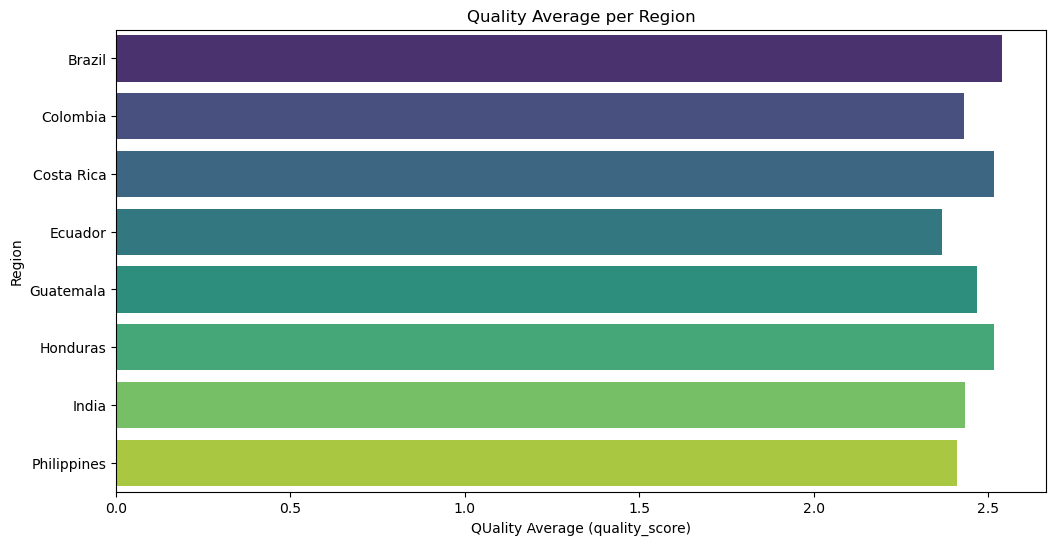

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(x='quality_score', y='region', data=region_stats, palette='viridis')
plt.title('Quality Average per Region')
plt.xlabel('QUality Average (quality_score)')
plt.ylabel('Region')
plt.show()

Brazil ranks the highest in quality average, followed by Honduras and Costa Rica, while the Ecuador shows the lowest average score among the regions listed. The relatively small differences between the scores indicate consistent quality across these regions, but with some variations in performance.

# Part 4: Analysis of Variety

First, it is important to see the scores of quality per each variety of banana

In [15]:
variety_stats = df.groupby('variety')['quality_score'].mean().reset_index()
variety_stats

,variety,quality_score
0,Blue Java,2.504051
1,Burro,2.461951
2,Cavendish,2.419490
3,Fehi,2.442500
4,Lady Finger,2.526966
5,Manzano,2.366354
6,Plantain,2.507917
7,Red Dacca,2.435618


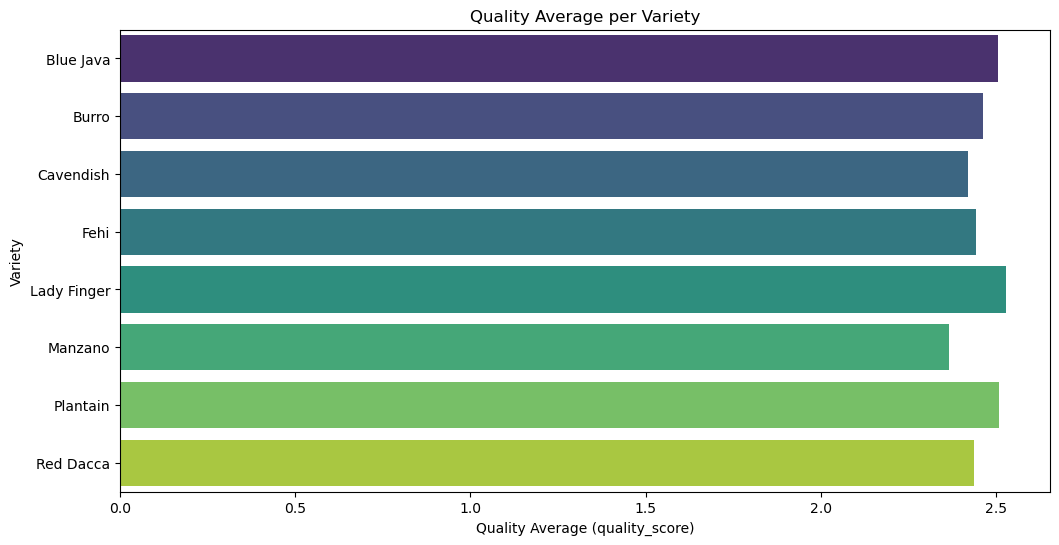

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x='quality_score', y='variety', data=variety_stats, palette='viridis')
plt.title('Quality Average per Variety')
plt.xlabel('Quality Average (quality_score)')
plt.ylabel('Variety')
plt.show()

Lady Finger has the highest quality average, while Manzano has the lowest among the listed varieties. The remaining varieties, such as Burro, Cavendish, and etc, fall within a similar range, suggesting moderate variation in quality scores across varieties.

# Part 5: Categories 

- 3 Categories (Normal, Good, Excellent)
- Limits defined with the percentiles 33 and 66

In [17]:
# Group by country and calculate quality score per country
country_stats = df.groupby('region')['quality_score'].mean().reset_index()

# Using percentiles to create categories of quality score
percentiles = country_stats['quality_score'].quantile([0.33, 0.66]).values

def categorize_quality_score(score):
    if score <= percentiles[0]:
        return 'Normal'
    elif percentiles[0] < score <= percentiles[1]:
        return 'Good'
    else:
        return 'Excellent'

# Apply function
country_stats['quality_category'] = country_stats['quality_score'].apply(categorize_quality_score)
country_stats

,region,quality_score,quality_category
0,Brazil,2.539242,Excellent
1,Colombia,2.431809,Normal
2,Costa Rica,2.518229,Excellent
3,Ecuador,2.366800,Normal
4,Guatemala,2.468043,Good
5,Honduras,2.517711,Excellent
6,India,2.435050,Good
7,Philippines,2.411935,Normal


# <font color='yellow'>Economy Per Country Database</font>

<img src = "https://st.adda247.com/https://wpassets.adda247.com/wp-content/uploads/multisite/sites/5/2023/01/27105804/Its-Official-India-becomes-5th-Largest-Economy-in-the-World-overtakes-UK-France-1.jpg" style="width: 200px;"/>

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

file_path = 'Global Economy Indicators.csv'
data = pd.read_csv(file_path)
scaler = StandardScaler()

In [19]:
# Strip leading/trailing spaces from column names
data.columns = data.columns.str.strip()
data

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,1.952772e+08,3.701468e+08,3.766908e+08,1.277478e+08,1.731454e+09,8.391720e+07,2.263871e+08,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,2.762965e+08,3.875495e+08,3.944012e+08,1.337541e+08,1.812857e+09,8.786038e+07,2.370192e+08,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,2.903704e+08,3.522847e+08,3.585129e+08,1.215827e+08,1.647918e+09,7.986452e+07,2.154773e+08,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,2.629629e+08,3.640103e+08,3.704458e+08,1.256302e+08,1.702735e+09,8.252888e+07,2.226243e+08,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,3.056792e+08,4.407604e+08,4.485528e+08,1.521192e+08,2.061752e+09,9.991860e+07,2.695259e+08,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,894,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,894,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,894,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10


## Grouping Countries to Eliminate Repetition
Were filteringhe dataset to ensure that each country is represented **only once**, rather than having repeated entries for every year. This was achieved by:

1. **Selecting Relevant Columns**:
   - We focused on key economic indicators, such as `Per capita GNI`, `GDP`, `Population`, `Imports`, `Total Value Added`, and `Exports`.

2. **Grouping by Country**:
   - We grouped the data by the `Country` column and calculated the **mean** of all numerical columns for each country. This ensures that metrics like GDP and Population are averaged across all available years, providing a consolidated view for each country.

3. **Normalization**:
   - After grouping, the numerical columns were normalized using `StandardScaler`. This step ensures that all indicators are on a comparable scale, which is particularly useful for analyses like clustering or composite scoring.

### Why Grouping is Important
By grouping the data this way:
- We avoid repetitive entries for the same country across multiple years.
- It simplifies the analysis by providing a single, averaged representation of each country’s metrics.
- The data becomes easier to visualize and interpret for tasks like categorizing countries into "Poor," "Mediocre," "Good," and "Great."

The resulting dataset now contains **one row per country**, with standardized values for the selected economic indicators.

In [20]:
# Select relevant columns
selected_columns = [
    "Per capita GNI", 
    "Gross Domestic Product (GDP)", 
    "Population", 
    "Imports of goods and services", 
    "Total Value Added", 
    "Exports of goods and services"
]

data_filtered = data[["Country"] + selected_columns]

# Group by Country and calculate the mean for each metric
data_grouped = data_filtered.groupby("Country").mean().reset_index()

# Extract numeric columns for normalization
data_numeric = data_grouped[selected_columns]

# Normalize the numeric data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_numeric)

# Combine normalized data with the Country column
data_normalized_df = pd.DataFrame(data_normalized, columns=selected_columns)
data_normalized_df["Country"] = data_grouped["Country"]

data_normalized_df = data_normalized_df[["Country"] + selected_columns]

data_normalized_df.head()

,Country,Per capita GNI,Gross Domestic Product (GDP),Population,Imports of goods and services,Total Value Added,Exports of goods and services
0,Afghanistan,-0.640083,-0.225240,-0.077912,-0.325693,-0.217072,-0.358950
1,Albania,-0.506621,-0.226721,-0.232700,-0.326074,-0.218908,-0.356494
2,Algeria,-0.469935,-0.123180,0.000615,-0.160144,-0.117143,-0.156343
3,Andorra,1.343618,-0.232497,-0.259866,-0.342423,-0.224245,-0.365270
4,Angola,-0.546918,-0.185521,-0.110110,-0.242855,-0.176393,-0.221330


### Why These Columns Were Selected

The dataset provides information on various economic indicators, including sector-specific details (e.g., agriculture, investments). While this is valuable, some columns aggregate these into totals, making it unnecessary to analyze every individual sector. Instead, we focus on a subset of key indicators that provide sufficient insight into whether a country’s economy is strong or weak.

Below are the selected columns and the reasoning behind their inclusion:

1. **Per capita GNI**:
   - Represents the Gross National Income divided by the population, giving an average income per person. This metric reflects a country's living standards and wealth distribution.

2. **Gross Domestic Product (GDP)**:
   - Measures the total economic output of a country. A higher GDP often indicates a larger, more productive economy.

3. **Population**:
   - Provides context for other metrics. For instance:
     - A large population with low GDP per capita may indicate poverty.
     - A small population with high GDP may indicate a wealthy, developed economy.

4. **Imports of Goods and Services**:
   - Reflects the level of trade and integration into the global economy.
   - High imports can indicate strong domestic demand, which often correlates with economic strength.

5. **Total Value Added**:
   - Summarizes the net output of all sectors within an economy, accounting for the costs of inputs.
   - It is a holistic measure of a country’s productive capabilities.

6. **Exports of Goods and Services**:
   - Indicates a country’s ability to produce goods and services competitive enough to sell internationally.
   - High exports often signify economic strength and industrial capacity.


In [21]:
# Assign weights to each column
weights = [1.0, 0.8, 0.5, 0.5, 1.2, 0.5]  # Custom weights for each metric

# Calculate the composite score as a weighted sum of normalized values
data_normalized_df["Composite Score"] = (data_normalized * weights).sum(axis=1)

### Assigning Weights

Each indicator is assigned a weight based on its importance to the overall evaluation. The weights reflect how much influence each indicator has on the final composite score:

- **Per capita GNI (1.0)**:
  - A critical indicator of individual wealth, so it has the highest weight.

- **Gross Domestic Product (GDP, 0.8)**:
  - Important for measuring total economic output but slightly less influential than GNI.

- **Population (0.5)**:
  - Provides context but is less directly tied to economic strength.

- **Imports/Exports of goods and services (0.5 each)**:
  - Reflect economic activity and global trade involvement but carry less weight.

- **Total Value Added (1.2)**:
  - Reflects the net productivity of all sectors, making it highly significant.

### Calculating the Composite Score

The normalized values for each indicator are multiplied by their respective weights and summed up for each country. This gives us a single **composite score** that combines the contributionf    Composite Score = (Weight 1 × Normalized GNI) + (Weight 2 × Normalized GDP) + ..]
malized GDP}) + \dots
\]

This composite score simplifies the evaluation of each country’s economic performance, allowing us to group countries into categories such as **"Poor," "Medocre," "Good," and "Great."**


### Why This Approach?

1. **Combines Multiple Indicators**:
   - This approach captures a holistic view of a country’s economy by using several key metrics rather than relying on a single indicator.

2. **Customizable Weights**:
   - Allows us to assign more importance to indicators that better reflect economic strength (e.g., GNI, Total Value Added).

3. **Simpler Evaluation**:
   - The composite score simplifies comparisons across countries by reducing multiple indicators into a single score that can be used for grouping.

---

### Why Not Use K-Means Clustering?

I initially attempted the k-means clustering method using 4 groups. However, the dataset does not provide enough diversity in the columns to create meaningful clusters. As a result, the clusters end up being very close to each other, offering little insight into the economic distinctions between countries.

---

### Why Manual Grouping Works Better

The manual grouping method allows us to:
- Define the groups based on the most relevant columns in the dataset.
- Decide how the groups are formed and which columns are used for evaluation.

While this approach introduces some bias (as the grouping criteria are subjective), it ensures that the analysis focuses on the most informative columns available in the dataset. By concentrating on these selected columns, we can create a more justifiable and insightful response to the data.


In [22]:
# Define thresholds for grouping based on the composite score
def assign_group(score):
    if score < -1.0: 
        return "Poor"
    elif -1.0 <= score < 0.5:
        return "Mediocre"
    elif 0.5 <= score < 1.5:
        return "Good"
    else:
        return "Great"

### Why These Thresholds Were Chosen

The thresholds for grouping countries into **"Poor," "Mediocre," "Good," and "Great"** are based on the composite scores, with each range representing a different level of economic strength:

1. **`< -1.0` (Poor)**:
   - Countries with scores below -1.0 perform poorly across the key economic indicators and are at the lower end of the scale.

2. **`-1.0 to 0.5` (Mediocre)**:
   - These countries are closer to the average but still have room for improvement in their economic performance.

3. **`0.5 to 1.5` (Good)**:
   - Countries in this range perform above average, showing strong economic indicators but not yet at the top level.

4. **`> 1.5` (Great)**:
   - Scores above 1.5 represent exceptional economic performance, with countries excelling across all key indicators.

### Why Use These Ranges?
The ranges make it easier to group countries based on how well they perform compared to others, using the normalized scores. This helps us classify countries in a way that makes sense based on their overall economic strength.

In [23]:
# Assign groups based on the composite score
data_normalized_df["Group"] = data_normalized_df["Composite Score"].apply(assign_group)

# Showcases the groups
data_normalized_df

,Country,Per capita GNI,Gross Domestic Product (GDP),Population,Imports of goods and services,Total Value Added,Exports of goods and services,Composite Score,Group
0,Afghanistan,-0.640083,-0.225240,-0.077912,-0.325693,-0.217072,-0.358950,-1.462039,Poor
1,Albania,-0.506621,-0.226721,-0.232700,-0.326074,-0.218908,-0.356494,-1.408321,Poor
2,Algeria,-0.469935,-0.123180,0.000615,-0.160144,-0.117143,-0.156343,-0.866987,Mediocre
3,Andorra,1.343618,-0.232497,-0.259866,-0.342423,-0.224245,-0.365270,0.404746,Mediocre
4,Angola,-0.546918,-0.185521,-0.110110,-0.242855,-0.176393,-0.221330,-1.194154,Poor
...,...,...,...,...,...,...,...,...,...
215,Yemen Democratic (Former),-0.652175,-0.234359,-0.240430,-0.343527,-0.225827,-0.368740,-1.587004,Poor
216,Yugoslavia (Former),-0.467562,-0.158966,-0.051713,-0.233780,-0.156297,-0.272173,-1.061124,Poor
217,Zambia,-0.610674,-0.222689,-0.168712,-0.317846,-0.214850,-0.340437,-1.460142,Poor
218,Zanzibar,-0.621766,-0.233842,-0.249995,-0.344945,-0.225427,-0.368132,-1.560889,Poor


**Next**

- Display the number of countries in each group (**Poor**, **Mediocre**, **Good**, **Great**).
- Show the names of the countries in each group.

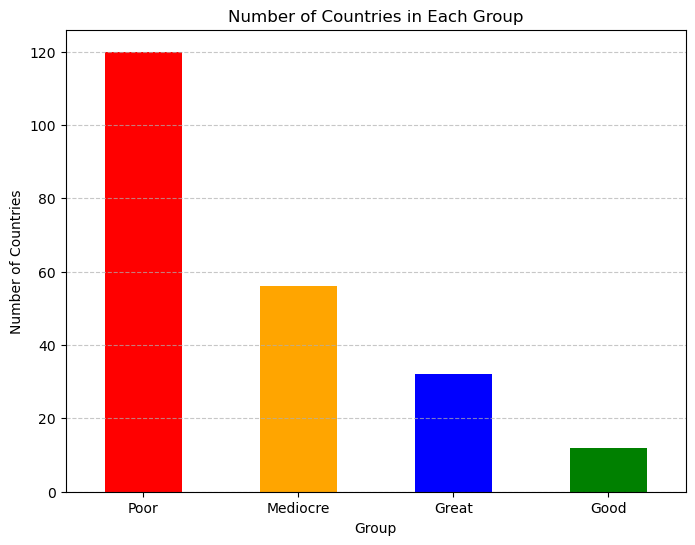

In [24]:
import matplotlib.pyplot as plt

# Count the number of countries in each group
group_counts = data_normalized_df["Group"].value_counts()

plt.figure(figsize=(8, 6))
group_counts.plot(kind="bar", color=["red", "orange", "blue", "green"])
plt.title("Number of Countries in Each Group")
plt.xlabel("Group")
plt.ylabel("Number of Countries")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [25]:
# Group countries by their assigned groups and remove duplicates
countries_by_group = data_normalized_df.groupby("Group")["Country"].apply(lambda x: list(set(x))).to_dict()

# Convert dictionary to a DataFrame for better display
grouped_countries_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in countries_by_group.items()]))

# Convert the DataFrame to HTML for better visualization
from IPython.display import display, HTML

# Create and display the HTML table without duplicates
html_table = grouped_countries_df.to_html(index=False)
display(HTML(html_table))


Good,Great,Mediocre,Poor
Saudi Arabia,Mexico,Andorra,Sao Tome and Principe
Cayman Islands,France,Libya,Guyana
Finland,Luxembourg,Iran (Islamic Republic of),Burkina Faso
Qatar,Sweden,Poland,Sudan (Former)
Czechia,Spain,Greenland,Côte d'Ivoire
Indonesia,Belgium,Bangladesh,Morocco
Israel,USSR (Former),British Virgin Islands,Bulgaria
San Marino,Switzerland,Malaysia,Republic of Moldova
Iceland,Norway,Colombia,Yemen Democratic (Former)
Türkiye,Russian Federation,Croatia,Niger


In [26]:
# Sort countries by exports (descending order)
exports_sorted = data_normalized_df.sort_values(by="Exports of goods and services", ascending=False)[["Country", "Exports of goods and services"]]

# Display the sorted list
print("\nCountries Ranked by Exports (Highest to Lowest):")
print(exports_sorted.to_string(index=False))


Countries Ranked by Exports (Highest to Lowest):
                             Country  Exports of goods and services
                      United States                        8.134642
                            Germany                        5.865270
                              China                        5.853206
                              Japan                        3.396954
                     United Kingdom                        3.046430
                             France                        2.962410
                        Netherlands                        2.260229
                              Italy                        2.162952
                 Russian Federation                        2.148997
                             Canada                        1.846982
                  Republic of Korea                        1.665824
               China, Hong Kong SAR                        1.631524
                          Singapore                        1.49138

In [27]:
# Sort countries by imports (descending order)
imports_sorted = data_grouped.sort_values(by="Imports of goods and services", ascending=False)[["Country", "Imports of goods and services"]]

# Display the sorted list
print("\nCountries Ranked by Imports (Highest to Lowest):")
print(imports_sorted.to_string(index=False))


Countries Ranked by Imports (Highest to Lowest):
                             Country  Imports of goods and services
                      United States                    1.300509e+12
                            Germany                    6.754748e+11
                              China                    6.598695e+11
                     United Kingdom                    4.290278e+11
                              Japan                    4.287031e+11
                             France                    4.042783e+11
                              Italy                    2.900780e+11
                        Netherlands                    2.800339e+11
                             Canada                    2.634688e+11
               China, Hong Kong SAR                    2.346993e+11
                  Republic of Korea                    2.269666e+11
                 Russian Federation                    2.230749e+11
                          Singapore                    1.945914e+1

# <font color='yellow'>Answering the Question:</font>

In [34]:
# List of countries of interest
countries_of_interest = [
    "Brazil", "Colombia", "Costa Rica", "Ecuador",
    "Guatemala", "Honduras", "India", "Philippines"
]

# Standardize and filter the data for the countries of interest
df['region'] = df['region'].str.strip().str.title()
data_normalized_df['Country'] = data_normalized_df['Country'].str.strip().str.title()

filtered_df = df[df['region'].isin(countries_of_interest)]
filtered_data = data_normalized_df[data_normalized_df['Country'].isin(countries_of_interest)]

# Merge the two DataFrames on the country
merged_df = pd.merge(filtered_df, filtered_data, left_on='region', right_on='Country', how='inner')

# Compare quality_score and Group per country
comparison = merged_df[['region', 'quality_score', 'Group']]
comparison


,region,quality_score,Group
0,Colombia,1.88,Mediocre
1,Colombia,2.50,Mediocre
2,Colombia,2.78,Mediocre
3,Colombia,3.26,Mediocre
4,Colombia,2.17,Mediocre
...,...,...,...
720,Philippines,3.00,Mediocre
721,Philippines,1.93,Mediocre
722,Philippines,3.03,Mediocre
723,Philippines,2.36,Mediocre


In [35]:
# Map the 'Group' to numerical values
group_mapping = {'Poor': 1, 'Mediocre': 2, 'Excellent': 3}
merged_df['Group_numeric'] = merged_df['Group'].map(group_mapping)

# Calculate Spearman correlation between quality_score and Group_numeric
correlation = merged_df[['quality_score', 'Group_numeric']].corr(method='spearman')

correlation

,quality_score,Group_numeric
quality_score,1.000000,-0.030134
Group_numeric,-0.030134,1.000000


### Final result:
The correlation value of -0.030134 is very close to 0, suggesting that there is almost no relationship between the banana quality (quality_score) and the economic Group (represented numerically).
The very low correlation suggests that, based on this dataset, the quality of bananas (as measured by quality_score) does not significantly correlate with the economic group of the country (Group). The economic group does not appear to depend on the quality of exported bananas in a meaningful way.

##### References:
- Santosh, D. T., Tiwari, K. N., & Reddy, R. G. (2017). Banana bunch covers for quality banana production-a review. Int. J. Curr. Microbiol. Appl. Sci, 6(7), 1275-1291.
- Guzmán-Alvarez, J. A., & Quesada, M. G. (2014). CORBANA-BANACLIMA A weather monitoring system to support the banana production in Costa Rica. CIGR Proceedings.
